<a href="https://colab.research.google.com/github/keerthi-challa/major_project/blob/main/waste_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/drive/MyDrive/majorproject_data')

print (dataset_path)

print("Types of classes labels found: ", len(dataset_path))

['dry_waste', 'wet_waste']
Types of classes labels found:  2


In [ ]:
class_labels = []

for item in dataset_path:

 all_classes = os.listdir('/content/drive/MyDrive/majorproject_data' + '/' +item)
 #print(all_classes)


 for room in all_classes:
    class_labels.append((item, str('/content/drive/MyDrive/majorproject_data' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [ ]:
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

      Labels                                              image
0  dry_waste  /content/drive/MyDrive/majorproject_data/dry_w...
1  dry_waste  /content/drive/MyDrive/majorproject_data/dry_w...
2  dry_waste  /content/drive/MyDrive/majorproject_data/dry_w...
3  dry_waste  /content/drive/MyDrive/majorproject_data/dry_w...
4  dry_waste  /content/drive/MyDrive/majorproject_data/dry_w...
         Labels                                              image
2508  wet_waste  /content/drive/MyDrive/majorproject_data/wet_w...
2509  wet_waste  /content/drive/MyDrive/majorproject_data/wet_w...
2510  wet_waste  /content/drive/MyDrive/majorproject_data/wet_w...
2511  wet_waste  /content/drive/MyDrive/majorproject_data/wet_w...
2512  wet_waste  /content/drive/MyDrive/majorproject_data/wet_w...


In [ ]:
print("Total number of images in the dataset: ", len(df))
label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  2513
wet_waste    1401
dry_waste    1112
Name: Labels, dtype: int64


In [ ]:
import cv2
path = '/content/drive/MyDrive/majorproject_data/'
dataset_path = os.listdir('/content/drive/MyDrive/majorproject_data')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [ ]:
images = np.array(images)
images = images.astype('float32')
images.shape

(2513, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['dry_waste' 'dry_waste' 'dry_waste' ... 'wet_waste' 'wet_waste'
 'wet_waste']
[0 0 0 ... 1 1 1]


In [ ]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y)
print(Y[:5])
print(Y[35:])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)


print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2387, 224, 224, 3)
(2387, 2)
(126, 224, 224, 3)
(126, 2)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 2
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))




outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [ ]:
import tensorflow as tf

model = tf.keras.Model(inputs, outputs)


model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=16, verbose=2)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 2)                 4052133   
 )                                                               
                                                                 
Total params: 4052133 (15.46 MB)
Trainable params: 4010110 (15.30 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________
Epoch 1/16
75/75 - 352s - loss: 1.8616 - accuracy: 0.6963 - 352s/epoch - 5s/step
Epoch 2/16
75/75 - 327s - loss: 0.6010 - accuracy: 0.8504 - 327s/epoch - 4s/step
Epoch 3/16
75/75 - 333s - loss: 0.3590 - accuracy: 0.8856 - 333s/epoch - 4s/step
Epoch 4/16
75/75 - 330s - loss: 0.3053 - accuracy: 0.8886 - 330s/epoch - 4s/step
Epoch 5/16
75/75 - 33

In [ ]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to a separate file
model.save_weights("kerasModel.h5")

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

4/4 [==============================] - 6s 1s/step - loss: 0.6931 - accuracy: 0.4603
Loss = 0.693146824836731
Test Accuracy = 0.460317462682724


Input image shape: (1, 224, 224, 3)


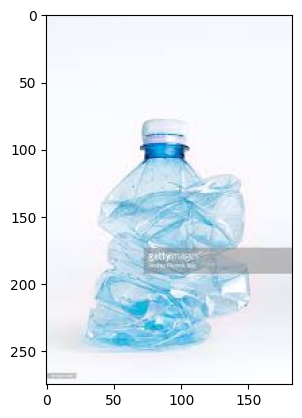

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/content/drive/MyDrive/R_56.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
preds=model.predict(x)
preds

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/content/drive/MyDrive/O_2248.jpg'



img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

y = np.expand_dims(img, axis=0)
y = preprocess_input(y)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
preds=model.predict(y)
preds

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming you have test data and true labels
test_predictions = model.predict(test_x)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(test_predictions, axis=1)

# Generate the classification report
report = classification_report(np.argmax(test_y, axis=1), predicted_labels)

# Print the classification report
print("Classification Report:")
print(report)


In [ ]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to a separate file
model.save_weights("kerasModel.h5")